**Table of contents**<a id='toc0_'></a>    
- 1. [Libraries](#toc1_)    
- 2. [Data Preparation](#toc2_)    
- 3. [Analysis](#toc3_)    
  - 3.1. [How do the target variables differs from gender?](#toc3_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[Libraries](#toc0_)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. <a id='toc2_'></a>[Data Preparation](#toc0_)

In [3]:
df = pd.read_excel('data/dados cc.xlsx', sheet_name='goiaba gostoso')
df

,Sexo,Classificação Racial,Ano,Matrículas,Ingressantes,Concluintes,Número de Evadidos
0,Feminino,Amarela,2017,30,9,1,8
1,Feminino,Amarela,2018,29,7,3,1
2,Feminino,Amarela,2019,30,9,2,2
3,Feminino,Amarela,2020,36,9,(Blank),3
4,Feminino,Amarela,2021,47,15,1,3
...,...,...,...,...,...,...,...
86,S/I,NaN,2019,(Blank),(Blank),(Blank),(Blank)
87,S/I,NaN,2020,(Blank),(Blank),(Blank),(Blank)
88,S/I,NaN,2021,(Blank),(Blank),(Blank),(Blank)
89,S/I,Parda,2022,1,(Blank),(Blank),(Blank)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Sexo                  91 non-null     object
 1   Classificação Racial  86 non-null     object
 2   Ano                   91 non-null     int64 
 3   Matrículas            91 non-null     object
 4   Ingressantes          91 non-null     object
 5   Concluintes           91 non-null     object
 6   Número de Evadidos    91 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.1+ KB


In [5]:
df.replace('(Blank)', 0, inplace=True)
df.replace(np.nan, 0, inplace=True)
df['Matrículas'] = df['Matrículas'].astype(int)
df['Ingressantes'] = df['Ingressantes'].astype(int)
df['Concluintes'] = df['Concluintes'].astype(int)
df['Número de Evadidos'] = df['Número de Evadidos'].astype(int)
df['Taxa de Evasão'] = df['Número de Evadidos'] / df['Matrículas']
df.replace(np.nan, 0, inplace=True)
df.head(20)

/tmp/ipykernel_910/3797424670.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('(Blank)', 0, inplace=True)


,Sexo,Classificação Racial,Ano,Matrículas,Ingressantes,Concluintes,Número de Evadidos,Taxa de Evasão
0,Feminino,Amarela,2017,30,9,1,8,0.266667
1,Feminino,Amarela,2018,29,7,3,1,0.034483
2,Feminino,Amarela,2019,30,9,2,2,0.066667
3,Feminino,Amarela,2020,36,9,0,3,0.083333
4,Feminino,Amarela,2021,47,15,1,3,0.063830
5,Feminino,Amarela,2022,50,6,1,9,0.180000
6,Feminino,Amarela,2023,52,13,3,11,0.211538
7,Feminino,Branca,2017,603,179,29,106,0.175788
8,Feminino,Branca,2018,680,205,33,90,0.132353
9,Feminino,Branca,2019,767,225,42,113,0.147327


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sexo                  91 non-null     object 
 1   Classificação Racial  91 non-null     object 
 2   Ano                   91 non-null     int64  
 3   Matrículas            91 non-null     int64  
 4   Ingressantes          91 non-null     int64  
 5   Concluintes           91 non-null     int64  
 6   Número de Evadidos    91 non-null     int64  
 7   Taxa de Evasão        91 non-null     float64
dtypes: float64(1), int64(5), object(2)
memory usage: 5.8+ KB


In [7]:
df_fem = df.query('Sexo == "Feminino"')
df_mas = df.query('Sexo == "Masculino"')

# 3. <a id='toc3_'></a>[Analysis](#toc0_)

## 3.1. <a id='toc3_1_'></a>[How do the target variables differs from gender?](#toc0_)

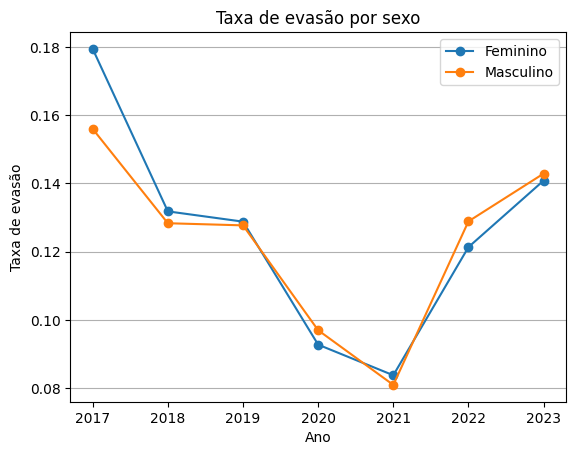

In [8]:
evasao_fem = df_fem.groupby('Ano')['Número de Evadidos'].sum() / df_fem.groupby('Ano')['Matrículas'].sum()
evasao_mas = df_mas.groupby('Ano')['Número de Evadidos'].sum() / df_mas.groupby('Ano')['Matrículas'].sum()

plt.plot(evasao_fem, label='Feminino', marker='o')
plt.plot(evasao_mas, label='Masculino', marker='o')
plt.title('Taxa de evasão por sexo')
plt.xlabel('Ano')
plt.ylabel('Taxa de evasão')
plt.grid(axis='y')
plt.legend()

In [9]:
df_prop_evasao = pd.DataFrame({
    'Evsão Feminina': evasao_fem,
    'Evasão Masculina': evasao_mas
}).reset_index()

df_prop_evasao

,Ano,Evsão Feminina,Evasão Masculina
0,2017,0.179458,0.156000
1,2018,0.131818,0.128339
2,2019,0.128805,0.127712
3,2020,0.092732,0.096957
4,2021,0.083750,0.080921
5,2022,0.121338,0.128892
6,2023,0.140845,0.142898


- A taxa de evasão de homens e mulheres em relação ao total de matriculados de cada sexo é praticamente igual, com um pequeno aumento entre as mulheres em 2017

---

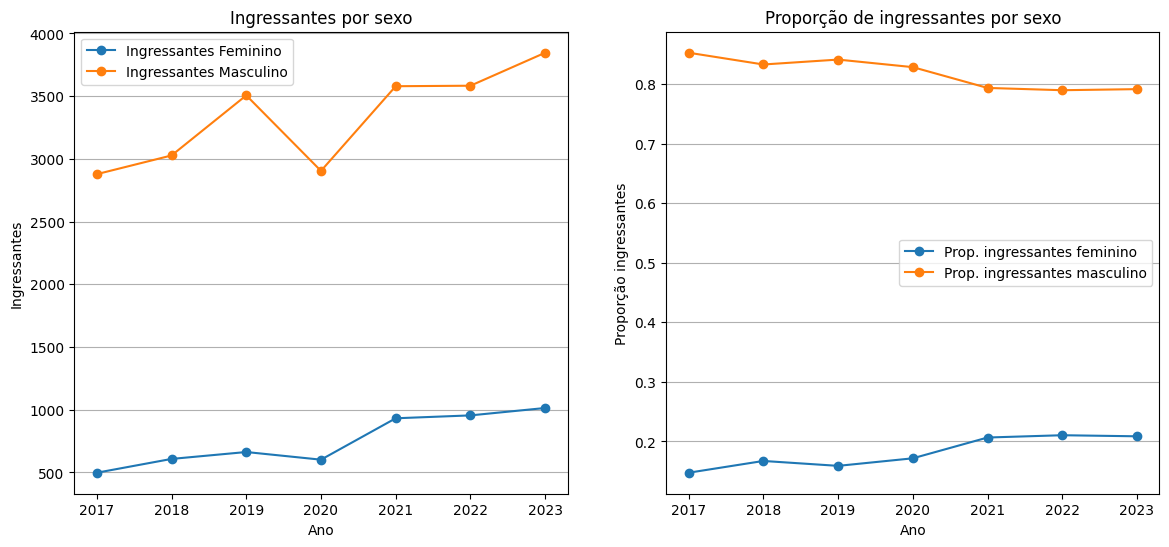

In [10]:
# ingressantes por sexo
fem_ingressantes = df_fem.groupby('Ano')['Ingressantes'].sum()
mas_ingressantes = df_mas.groupby('Ano')['Ingressantes'].sum()

# proporção de ingressantes por sexo
prop_fem_ingressantes = fem_ingressantes / df.groupby('Ano')['Ingressantes'].sum()
prop_mas_ingressantes = mas_ingressantes / df.groupby('Ano')['Ingressantes'].sum()

fig, ax = plt.subplots(1,2, figsize=(14, 6))

ax[0].plot(fem_ingressantes, label='Ingressantes Feminino', marker='o')
ax[0].plot(mas_ingressantes, label='Ingressantes Masculino', marker='o')
ax[0].set_title('Ingressantes por sexo')
ax[0].set_xlabel('Ano')
ax[0].set_ylabel('Ingressantes')
ax[0].legend()
ax[0].grid(axis='y')

ax[1].plot(prop_fem_ingressantes, label='Prop. ingressantes feminino', marker='o')
ax[1].plot(prop_mas_ingressantes, label='Prop. ingressantes masculino', marker='o')
ax[1].set_title('Proporção de ingressantes por sexo')
ax[1].set_xlabel('Ano')
ax[1].set_ylabel('Proporção ingressantes')
ax[1].legend()
ax[1].grid(axis='y')

In [11]:
print(f'Diferença prop_fem_ingressantes: {(prop_fem_ingressantes[2023] - prop_fem_ingressantes[2017])}')
print(f'Homens 2017: {prop_mas_ingressantes[2017]} | Homens 2023: {prop_mas_ingressantes[2023]}')

df_prop_ingressantes = pd.DataFrame({
    'Ingressantes Feminino': prop_fem_ingressantes,
    'Ingressantes Masculino': prop_mas_ingressantes
}).reset_index()

df_prop_ingressantes

Diferença prop_fem_ingressantes: 0.06113012696740974
Homens 2017: 0.8524881516587678 | Homens 2023: 0.7913580246913581


,Ano,Ingressantes Feminino,Ingressantes Masculino
0,2017,0.147512,0.852488
1,2018,0.167263,0.832737
2,2019,0.159031,0.840969
3,2020,0.171706,0.828294
4,2021,0.206606,0.793394
5,2022,0.210445,0.789555
6,2023,0.208642,0.791358


- De 2017 para 2023, houve um aumento de 6,1% na proporção de mulheres ingressantes em cursos de bacharelado do subeixo informática

- Proporção de ingressantes homens em 2017 era de 85,2% e 79,1% em 2023

---

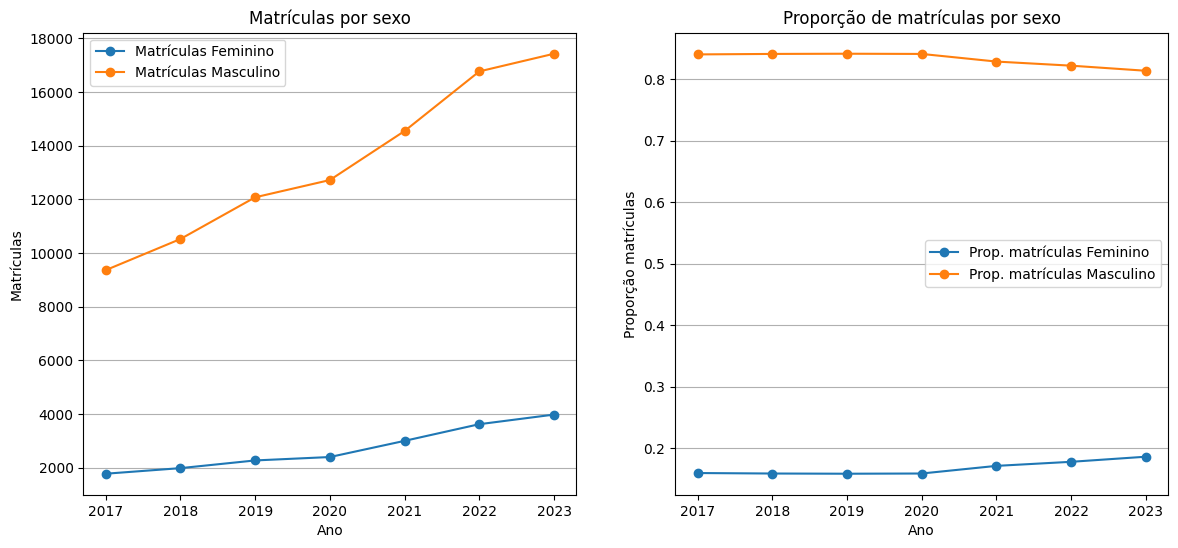

In [12]:
# matriculas por sexo
fem_matriculas = df_fem.groupby('Ano')['Matrículas'].sum()
mas_matriculas = df_mas.groupby('Ano')['Matrículas'].sum()

# proporção de matriculas por sexo
prop_fem_matriculas = fem_matriculas / df.groupby('Ano')['Matrículas'].sum()
prop_mas_matriculas = mas_matriculas / df.groupby('Ano')['Matrículas'].sum()

fig, ax = plt.subplots(1,2, figsize=(14, 6))

ax[0].plot(fem_matriculas, label='Matrículas Feminino', marker='o')
ax[0].plot(mas_matriculas, label='Matrículas Masculino', marker='o')
ax[0].set_title('Matrículas por sexo')
ax[0].set_xlabel('Ano')
ax[0].set_ylabel('Matrículas')
ax[0].legend()
ax[0].grid(axis='y')

ax[1].plot(prop_fem_matriculas, label='Prop. matrículas Feminino', marker='o')
ax[1].plot(prop_mas_matriculas, label='Prop. matrículas Masculino', marker='o')
ax[1].set_title('Proporção de matrículas por sexo')
ax[1].set_xlabel('Ano')
ax[1].set_ylabel('Proporção matrículas')
ax[1].legend()
ax[1].grid(axis='y')

In [13]:
df_prop_matriculas = pd.DataFrame({
    'Matriculados Feminino': prop_fem_matriculas,
    'Matriculados Masculino': prop_mas_matriculas
}).reset_index()

df_prop_matriculas

,Ano,Matriculados Feminino,Matriculados Masculino
0,2017,0.159195,0.840805
1,2018,0.158413,0.841587
2,2019,0.158078,0.841922
3,2020,0.158428,0.841572
4,2021,0.170847,0.829153
5,2022,0.177483,0.822468
6,2023,0.185777,0.814176


- A proporção de mulhers matriculadas teve um leve aumento ao decorrer dos anos em comparação aos homens

- Uma taxa de evasão proporcional entre os sexos e um aumento no quantidade de ingressantes do sexo feminino pode ter contribuído para isso

---

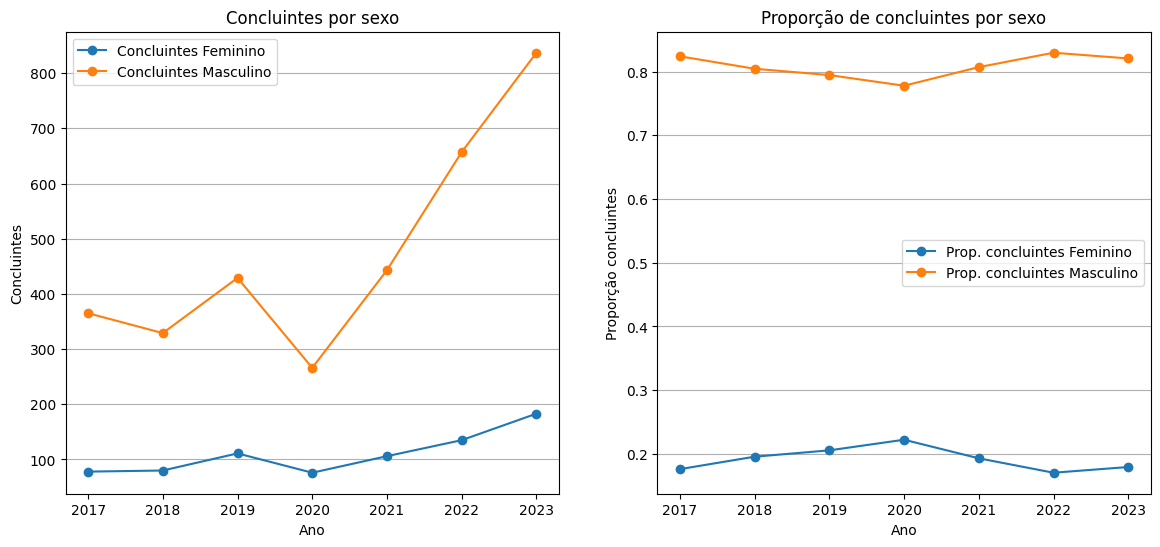

In [14]:
# concluintes por sexo
fem_concluintes = df_fem.groupby('Ano')['Concluintes'].sum()
mas_concluintes = df_mas.groupby('Ano')['Concluintes'].sum()

# proporção de concluintes por sexo
prop_fem_concluintes = fem_concluintes / df.groupby('Ano')['Concluintes'].sum()
prop_mas_concluintes = mas_concluintes / df.groupby('Ano')['Concluintes'].sum()

fig, ax = plt.subplots(1,2, figsize=(14, 6))

ax[0].plot(fem_concluintes, label='Concluintes Feminino', marker='o')
ax[0].plot(mas_concluintes, label='Concluintes Masculino', marker='o')
ax[0].set_title('Concluintes por sexo')
ax[0].set_xlabel('Ano')
ax[0].set_ylabel('Concluintes')
ax[0].legend()
ax[0].grid(axis='y')

ax[1].plot(prop_fem_concluintes, label='Prop. concluintes Feminino', marker='o')
ax[1].plot(prop_mas_concluintes, label='Prop. concluintes Masculino', marker='o')
ax[1].set_title('Proporção de concluintes por sexo')
ax[1].set_xlabel('Ano')
ax[1].set_ylabel('Proporção concluintes')
ax[1].legend()
ax[1].grid(axis='y')

In [15]:
df_prop_concluintes = pd.DataFrame({
    'Concluintes Feminino': prop_fem_concluintes,
    'Concluintes Masculino': prop_mas_concluintes
}).reset_index()

df_prop_concluintes

,Ano,Concluintes Feminino,Concluintes Masculino
0,2017,0.176072,0.823928
1,2018,0.195599,0.804401
2,2019,0.205556,0.794444
3,2020,0.222222,0.777778
4,2021,0.193078,0.806922
5,2022,0.170455,0.829545
6,2023,0.179412,0.820588


- O número de concluíntes aumentou significativamente nos anos após 2020, possivelmente devido a pandemia

- A proporção de mulheres concluintes vinha crescendo até 2020, sofrendo uma queda nos anos seguintes

## How do the target variables differs from racial components?

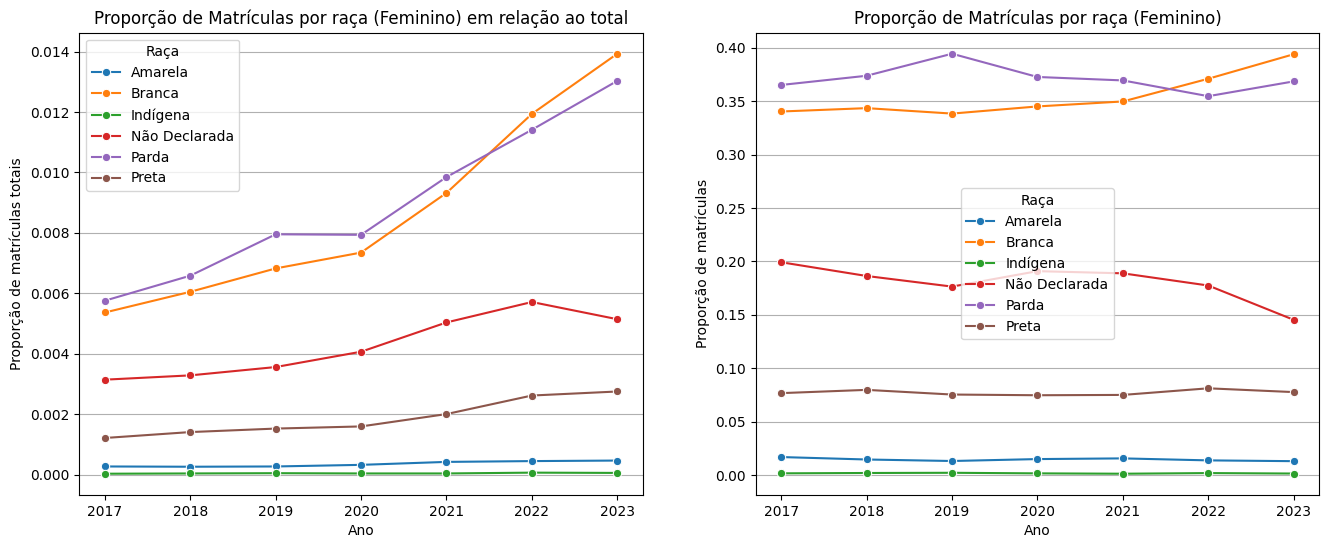

In [16]:
fem_raca_matriculas_total = df_fem.groupby(['Ano','Classificação Racial'])['Matrículas'].sum() / df['Matrículas'].sum()
fem_raca_matriculas = df_fem.groupby(['Ano','Classificação Racial'])['Matrículas'].sum() / df_fem.groupby('Ano')['Matrículas'].sum()

fem_raca_matriculas_total = fem_raca_matriculas_total.reset_index()
fem_raca_matriculas = fem_raca_matriculas.reset_index()

fig, ax = plt.subplots(1,2, figsize=(16, 6))

sns.lineplot(
    data=fem_raca_matriculas_total, 
    x="Ano", 
    y="Matrículas", 
    hue="Classificação Racial",
    marker="o",
    ax=ax[0]
)

ax[0].set_title('Proporção de Matrículas por raça (Feminino) em relação ao total')
ax[0].set_xlabel('Ano')
ax[0].set_ylabel('Proporção de matrículas totais')
ax[0].legend(title='Raça')
ax[0].grid(axis='y')


sns.lineplot(
    data=fem_raca_matriculas, 
    x="Ano", 
    y="Matrículas", 
    hue="Classificação Racial",
    marker="o",
    ax=ax[1]
)

ax[1].set_title('Proporção de Matrículas por raça (Feminino)')
ax[1].set_xlabel('Ano')
ax[1].set_ylabel('Proporção de matrículas')
ax[1].legend(title='Raça')
ax[1].grid(axis='y')

---

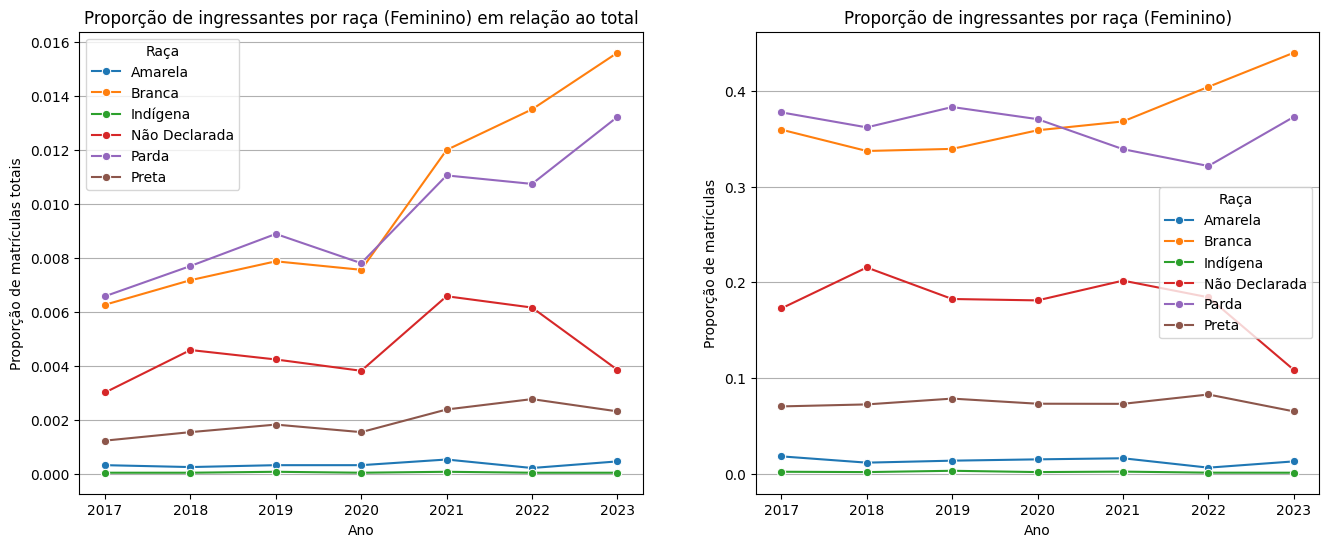

In [17]:
fem_raca_ingressante_total = df_fem.groupby(['Ano','Classificação Racial'])['Ingressantes'].sum() / df['Ingressantes'].sum()
fem_raca_ingressante = df_fem.groupby(['Ano','Classificação Racial'])['Ingressantes'].sum() / df_fem.groupby('Ano')['Ingressantes'].sum()

fem_raca_ingressante_total = fem_raca_ingressante_total.reset_index()
fem_raca_ingressante = fem_raca_ingressante.reset_index()

fig, ax = plt.subplots(1,2, figsize=(16, 6))

sns.lineplot(
    data=fem_raca_ingressante_total, 
    x="Ano", 
    y="Ingressantes", 
    hue="Classificação Racial",
    marker="o",
    ax=ax[0]
)

ax[0].set_title('Proporção de ingressantes por raça (Feminino) em relação ao total')
ax[0].set_xlabel('Ano')
ax[0].set_ylabel('Proporção de matrículas totais')
ax[0].legend(title='Raça')
ax[0].grid(axis='y')


sns.lineplot(
    data=fem_raca_ingressante, 
    x="Ano", 
    y="Ingressantes", 
    hue="Classificação Racial",
    marker="o",
    ax=ax[1]
)

ax[1].set_title('Proporção de ingressantes por raça (Feminino)')
ax[1].set_xlabel('Ano')
ax[1].set_ylabel('Proporção de matrículas')
ax[1].legend(title='Raça')
ax[1].grid(axis='y')

- 

---

In [18]:
df_tmp = pd.DataFrame(df.groupby(['Ano','Sexo'])['Número de Evadidos'].sum() / df.groupby(['Ano','Sexo'])['Matrículas'].sum()).reset_index()
prop_evasao_sexo = df_tmp[df_tmp['Sexo'] != 'S/I']
prop_evasao_sexo

,Ano,Sexo,0
0,2017,Feminino,0.179458
1,2017,Masculino,0.156000
3,2018,Feminino,0.131818
4,2018,Masculino,0.128339
6,2019,Feminino,0.128805
7,2019,Masculino,0.127712
9,2020,Feminino,0.092732
10,2020,Masculino,0.096957
12,2021,Feminino,0.083750
13,2021,Masculino,0.080921


In [19]:
cores_raciais = {
    "Branca": "#1f77b4",    # Azul
    "Preta": "#ff7f0e",     # Laranja
    "Parda": "#2ca02c",     # Verde
    "Amarela": "#d62728",   # Vermelho
    "Indígena": "#9467bd",   # Roxo
    "Não Declarada": "#8c564b", # Marrom
}


**Evasão**

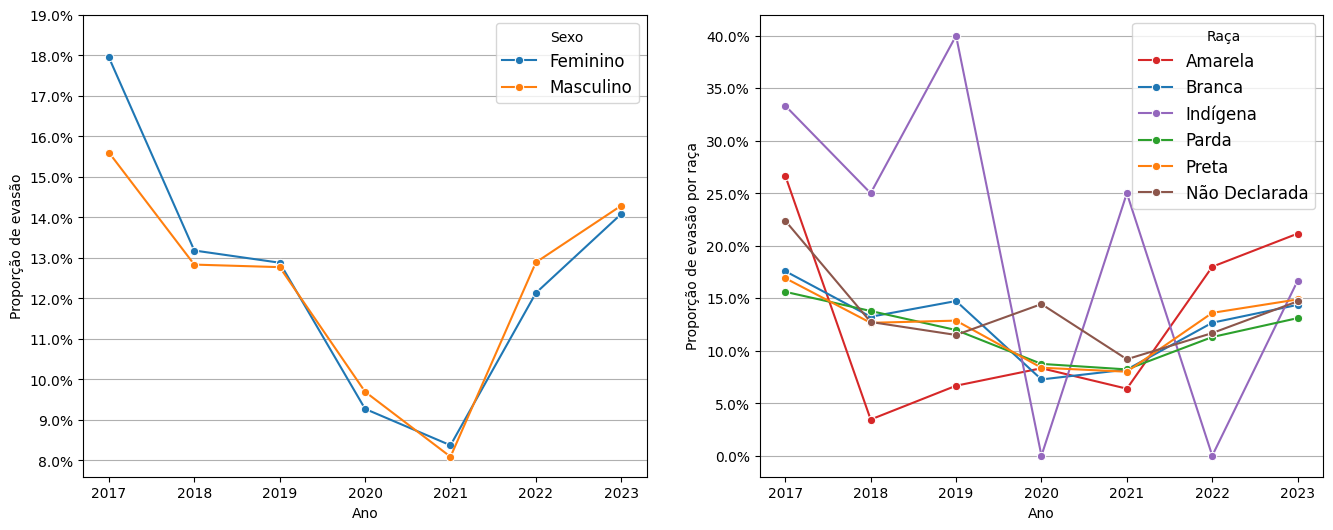

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Increase font sizes globally
plt.rcParams.update({'legend.fontsize': 12, 'axes.titlesize': 14, 'axes.labelsize': 15, 'xtick.labelsize': 13, 'ytick.labelsize': 13})

sns.lineplot(
    data=prop_evasao_sexo, 
    x="Ano", 
    y=0,
    hue="Sexo",
    marker="o",
    ax=ax[0]
)

# ax[0].set_title('Proporção de Evasão por raça sexo')
ax[0].set_xlabel('Ano')
ax[0].set_ylabel('Proporção de evasão')
ax[0].legend(title='Sexo')
ax[0].grid(axis='y')
ax[0].set_yticks(np.arange(0.08, 0.2, 0.01), labels=[f'{i:.1%}' for i in np.arange(0.08, 0.2, 0.01)])

sns.lineplot(
    data=df_fem, 
    x="Ano", 
    y="Taxa de Evasão", 
    hue="Classificação Racial",
    marker="o",
    ax=ax[1],
    palette=cores_raciais,
)

# ax[1].set_title('Proporção de evasão por raça entre o sexo feminino')
ax[1].set_xlabel('Ano')
ax[1].set_ylabel('Proporção de evasão por raça')
ax[1].legend(title='Raça')
ax[1].grid(axis='y')
ax[1].set_yticks(np.arange(0, 0.41, 0.05), labels=[f'{i:.1%}' for i in np.arange(0, 0.41, 0.05)]);

**Matrículas**

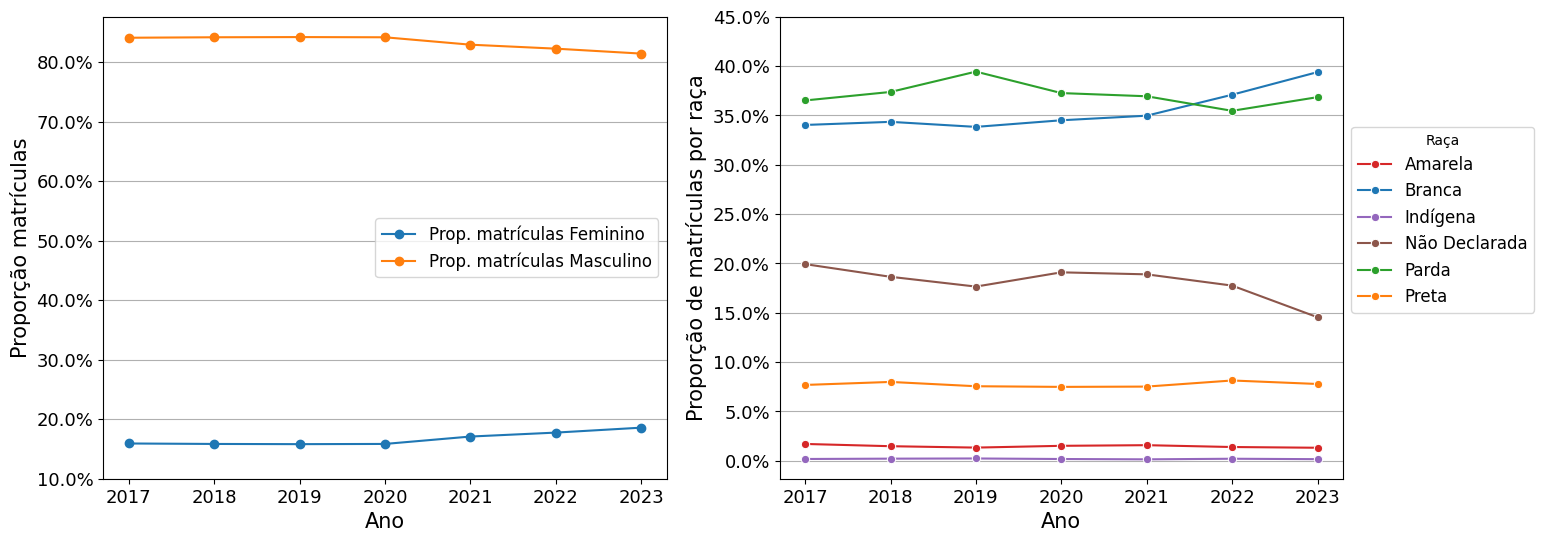

In [21]:
# matriculas por sexo
fem_matriculas = df_fem.groupby('Ano')['Matrículas'].sum()
mas_matriculas = df_mas.groupby('Ano')['Matrículas'].sum()

# proporção de matriculas por sexo
prop_fem_matriculas = fem_matriculas / df.groupby('Ano')['Matrículas'].sum()
prop_mas_matriculas = mas_matriculas / df.groupby('Ano')['Matrículas'].sum()


fig, ax = plt.subplots(1,2, figsize=(16, 6))

ax[0].plot(prop_fem_matriculas, label='Prop. matrículas Feminino', marker='o')
ax[0].plot(prop_mas_matriculas, label='Prop. matrículas Masculino', marker='o')
# ax[0].set_title('Proporção de matrículas por sexo')
ax[0].set_xlabel('Ano')
ax[0].set_ylabel('Proporção matrículas')
ax[0].legend()
ax[0].grid(axis='y')
ax[0].set_yticks(np.arange(0.1, 0.9, 0.1), labels=[f'{i:.1%}' for i in np.arange(0.1, 0.9, 0.1)])


sns.lineplot(
    data=fem_raca_matriculas, 
    x="Ano", 
    y="Matrículas", 
    hue="Classificação Racial",
    marker="o",
    ax=ax[1],
    palette=cores_raciais,
)

# ax[1].set_title('Proporção de matrículas por raça entre o sexo feminino')
ax[1].set_xlabel('Ano')
ax[1].set_ylabel('Proporção de matrículas por raça')
ax[1].legend(title='Raça', loc='upper left', bbox_to_anchor=(1, 0.78))
ax[1].grid(axis='y')
ax[1].set_yticks(np.arange(0, 0.5, 0.05), labels=[f'{i:.1%}' for i in np.arange(0, 0.5, 0.05)]);


**Concluintes**

In [22]:
df_fem_conc_raca = pd.DataFrame(df_fem.groupby(['Ano','Classificação Racial'])['Concluintes'].sum() / df_fem.groupby(['Ano'])['Concluintes'].sum()).reset_index()
df_mas_conc_raca = pd.DataFrame(df_mas.groupby(['Ano','Classificação Racial'])['Concluintes'].sum() / df_mas.groupby(['Ano'])['Concluintes'].sum()).reset_index()

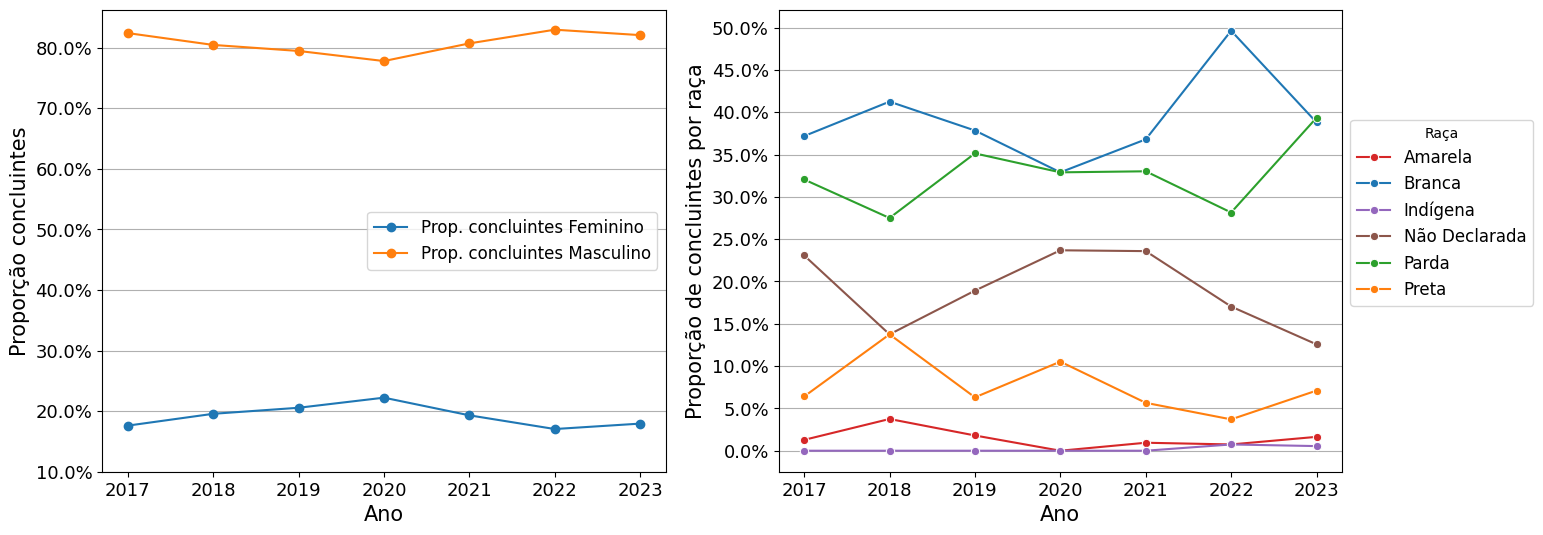

In [23]:
# concluintes por sexo
fem_concluintes = df_fem.groupby('Ano')['Concluintes'].sum()
mas_concluintes = df_mas.groupby('Ano')['Concluintes'].sum()

# proporção de concluintes por sexo
prop_fem_concluintes = fem_concluintes / df.groupby('Ano')['Concluintes'].sum()
prop_mas_concluintes = mas_concluintes / df.groupby('Ano')['Concluintes'].sum()



fig, ax = plt.subplots(1,2, figsize=(16, 6))

ax[0].plot(prop_fem_concluintes, label='Prop. concluintes Feminino', marker='o')
ax[0].plot(prop_mas_concluintes, label='Prop. concluintes Masculino', marker='o')
# ax[0].set_title('Proporção de concluintes por sexo')
ax[0].set_xlabel('Ano')
ax[0].set_ylabel('Proporção concluintes')
ax[0].legend()
ax[0].grid(axis='y')
ax[0].set_yticks(np.arange(0.1, 0.9, 0.1), labels=[f'{i:.1%}' for i in np.arange(0.1, 0.9, 0.1)]);

# CONCLUINTES HOMENS POR RAÇA
# sns.lineplot(
#     data=df_mas_conc_raca, 
#     x="Ano", 
#     y="Concluintes", 
#     hue="Classificação Racial",
#     marker="o",
#     ax=ax[0],
#     palette=cores_raciais,
# )
# ax[0].set_title('Proporção de concluintes por raça entre o sexo feminino')
# ax[0].set_xlabel('Ano')
# ax[0].set_ylabel('Proporção de concluintes')
# ax[0].legend(title='Raça', loc='upper left', bbox_to_anchor=(1.0, 0.78))
# ax[0].grid(axis='y')
# ax[0].set_yticks(np.arange(0, 0.51, 0.05), labels=[f'{i:.1%}' for i in np.arange(0, 0.51, 0.05)]);



sns.lineplot(
    data=df_fem_conc_raca, 
    x="Ano", 
    y="Concluintes", 
    hue="Classificação Racial",
    marker="o",
    ax=ax[1],
    palette=cores_raciais,
)

# ax[1].set_title('Proporção de concluintes por raça entre o sexo feminino')
ax[1].set_xlabel('Ano')
ax[1].set_ylabel('Proporção de concluintes por raça')
ax[1].legend(title='Raça', loc='upper left', bbox_to_anchor=(1.0, 0.78))
ax[1].grid(axis='y')
ax[1].set_yticks(np.arange(0, 0.51, 0.05), labels=[f'{i:.1%}' for i in np.arange(0, 0.51, 0.05)]);

**Ingressantes**

In [24]:
fem_raca_ingressante

,Ano,Classificação Racial,Ingressantes
0,2017,Amarela,0.018072
1,2017,Branca,0.359438
2,2017,Indígena,0.002008
3,2017,Não Declarada,0.172691
4,2017,Parda,0.377510
5,2017,Preta,0.070281
6,2018,Amarela,0.011513
7,2018,Branca,0.337171
8,2018,Indígena,0.001645
9,2018,Não Declarada,0.215461


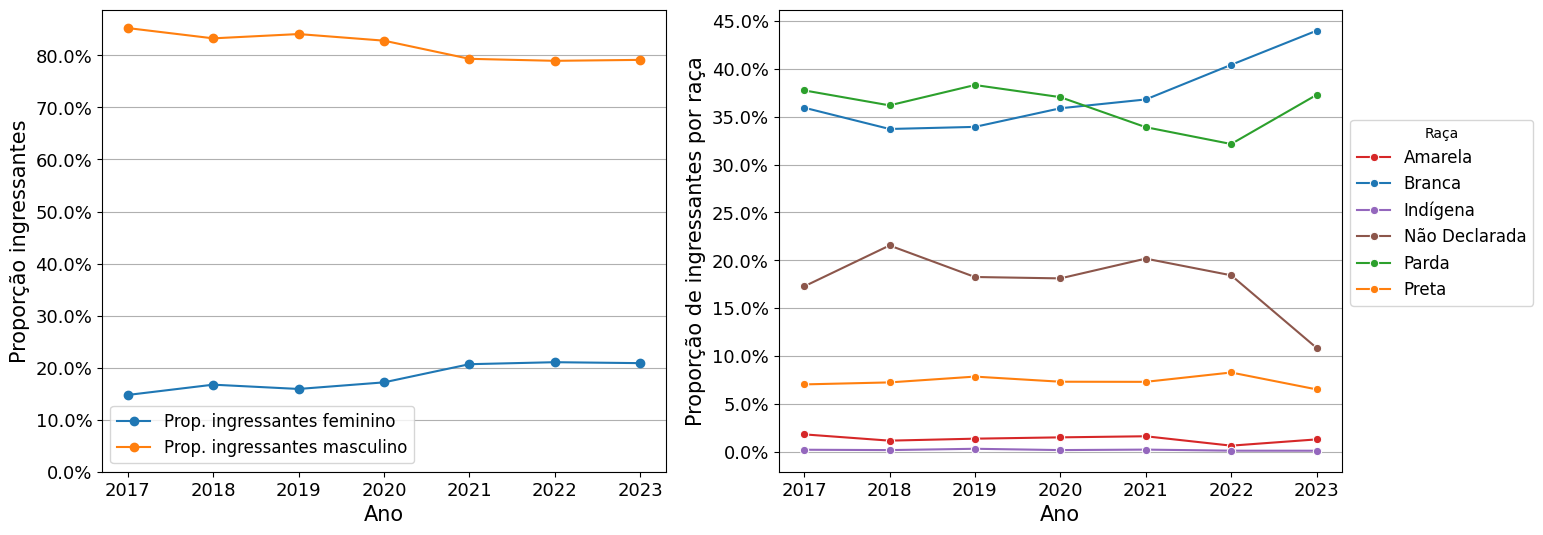

In [27]:
# ingressantes por sexo
fem_ingressantes = df_fem.groupby('Ano')['Ingressantes'].sum()
mas_ingressantes = df_mas.groupby('Ano')['Ingressantes'].sum()

# proporção de ingressantes por sexo
prop_fem_ingressantes = fem_ingressantes / df.groupby('Ano')['Ingressantes'].sum()
prop_mas_ingressantes = mas_ingressantes / df.groupby('Ano')['Ingressantes'].sum()


fem_raca_ingressante = df_fem.groupby(['Ano','Classificação Racial'])['Ingressantes'].sum() / df_fem.groupby('Ano')['Ingressantes'].sum()
fem_raca_ingressante = fem_raca_ingressante.reset_index()


fig, ax = plt.subplots(1,2, figsize=(16, 6))

ax[0].plot(prop_fem_ingressantes, label='Prop. ingressantes feminino', marker='o')
ax[0].plot(prop_mas_ingressantes, label='Prop. ingressantes masculino', marker='o')
# ax[0].set_title('Proporção de ingressantes por sexo')
ax[0].set_xlabel('Ano')
ax[0].set_ylabel('Proporção ingressantes')
ax[0].legend()
ax[0].grid(axis='y')
ax[0].set_yticks(np.arange(0, 0.9, 0.1), labels=[f'{i:.1%}' for i in np.arange(0, 0.9, 0.1)]);


sns.lineplot(
    data=fem_raca_ingressante, 
    x="Ano", 
    y="Ingressantes", 
    hue="Classificação Racial",
    marker="o",
    ax=ax[1],
    palette=cores_raciais
)

# ax[1].set_title('Proporção de ingressantes por raça entre o sexo feminino')
ax[1].set_xlabel('Ano')
ax[1].set_ylabel('Proporção de ingressantes por raça')
# ax[1].legend(title='Raça')
ax[1].legend(title='Raça', loc='upper left', bbox_to_anchor=(1.0, 0.78))
ax[1].grid(axis='y')
ax[1].set_yticks(np.arange(0, 0.46, 0.05), labels=[f'{i:.1%}' for i in np.arange(0, 0.46, 0.05)]);


Comparação de matrículas por raça

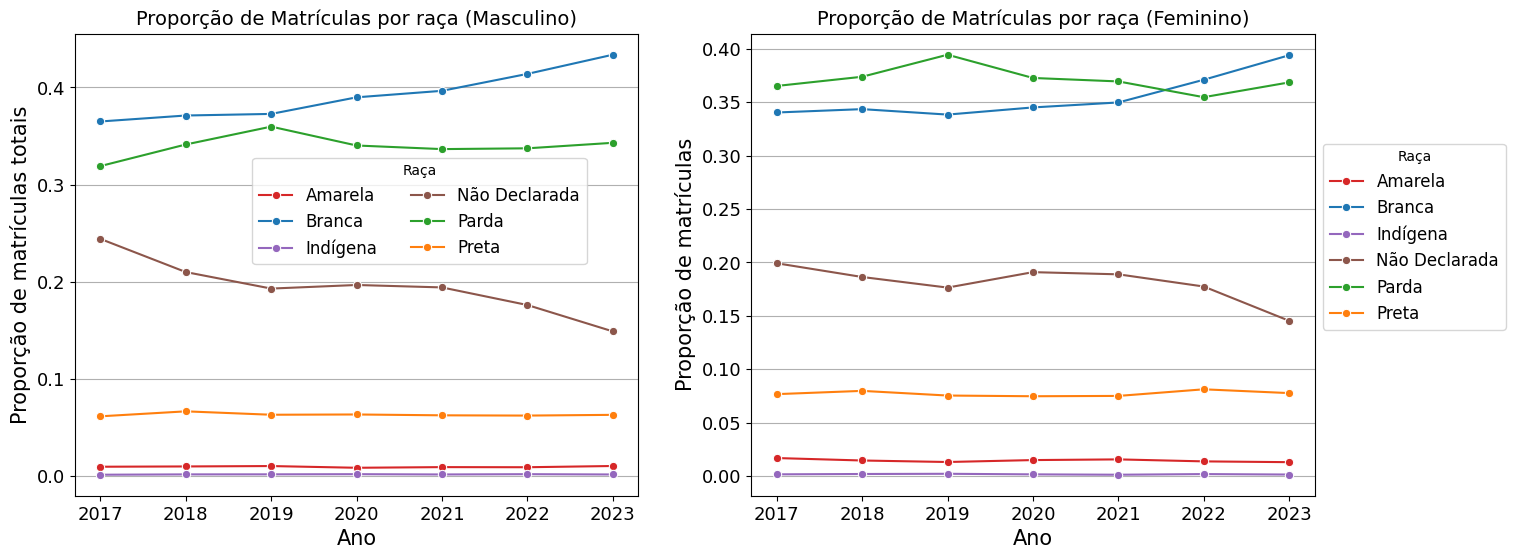

In [26]:
fem_raca_ingressante_total = df_fem.groupby(['Ano','Classificação Racial'])['Matrículas'].sum() / df['Matrículas'].sum()
fem_raca_ingressante = df_fem.groupby(['Ano','Classificação Racial'])['Matrículas'].sum() / df_fem.groupby('Ano')['Matrículas'].sum()

fem_raca_ingressante_total = fem_raca_ingressante_total.reset_index()
fem_raca_ingressante = fem_raca_ingressante.reset_index()

mas_raca_ingressante_total = df_mas.groupby(['Ano','Classificação Racial'])['Matrículas'].sum() / df['Matrículas'].sum()
mas_raca_ingressante = df_mas.groupby(['Ano','Classificação Racial'])['Matrículas'].sum() / df_mas.groupby('Ano')['Matrículas'].sum()

mas_raca_ingressante_total = mas_raca_ingressante_total.reset_index()
mas_raca_ingressante = mas_raca_ingressante.reset_index()



fig, ax = plt.subplots(1,2, figsize=(16, 6))

sns.lineplot(
    data=mas_raca_ingressante, 
    x="Ano", 
    y="Matrículas", 
    hue="Classificação Racial",
    marker="o",
    ax=ax[0],
    palette=cores_raciais
)

ax[0].set_title('Proporção de Matrículas por raça (Masculino)')
ax[0].set_xlabel('Ano')
ax[0].set_ylabel('Proporção de matrículas totais')
ax[0].legend(title='Raça')
ax[0].grid(axis='y')


sns.lineplot(
    data=fem_raca_ingressante, 
    x="Ano", 
    y="Matrículas", 
    hue="Classificação Racial",
    marker="o",
    ax=ax[1],
    palette=cores_raciais
)

ax[1].set_title('Proporção de Matrículas por raça (Feminino)')
ax[1].set_xlabel('Ano')
ax[1].set_ylabel('Proporção de matrículas')
ax[1].legend(title='Raça')
ax[1].grid(axis='y')

ax[0].legend(title='Raça', loc='upper left', bbox_to_anchor=(0.3, 0.75), ncol=2)
ax[1].legend(title='Raça', loc='upper left', bbox_to_anchor=(1.0, 0.78))
